In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
data = pd.read_csv("../data/Barcelona_Fotocasa_HousingPrices.csv")

# tratamiento valores nulos

In [95]:
# Porcentaje de datos nulos
data.isnull().sum()
(data.isnull().sum() / len(data)) * 100

Unnamed: 0             0.000000
price                  0.000000
rooms                  0.000000
bathroom               0.000000
lift                   0.000000
terrace                0.000000
square_meters          0.000000
real_state             3.273083
neighborhood           0.000000
square_meters_price    0.000000
dtype: float64

In [96]:
data = data.dropna(subset=['real_state'])
data.reset_index(drop=True, inplace=True)

# tratamiento outliers

In [97]:
data.describe()

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,4102.152399,1434.894949,2.444066,1.504672,84.538636,17.625957
std,2362.481061,1119.528321,1.125266,0.728770,47.584487,9.015493
min,0.000000,320.000000,0.000000,1.000000,10.000000,5.555556
25%,2052.750000,875.000000,2.000000,1.000000,56.000000,12.777778
50%,4098.500000,1100.000000,2.000000,1.000000,73.000000,15.217391
75%,6155.250000,1500.000000,3.000000,2.000000,95.000000,19.298246
max,8187.000000,15000.000000,10.000000,8.000000,679.000000,185.000000


<Axes: xlabel='square_meters'>

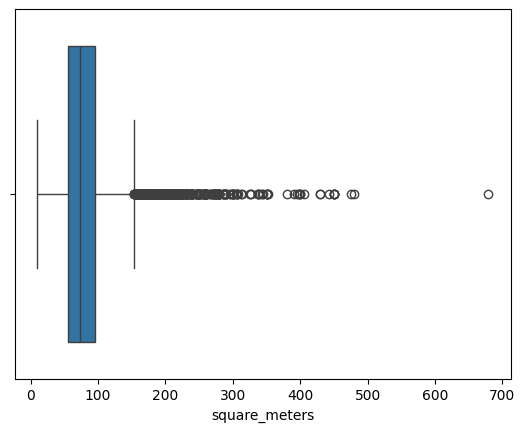

In [98]:
# grafico para detectar outliers en 'square_meters'
sns.boxplot(x=data['square_meters'])

In [99]:
# Buscamos outliers en 'square_meters'
data[data['square_meters'] > 600]

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
7455,7706,10750,0,1,True,False,679,flat,Sant Martí,15.832106


In [100]:
# eliminamos la fila con el outlier
data.drop(data[data.square_meters > 600].index, inplace=True)
data.reset_index(drop=True, inplace=True)

<Axes: xlabel='price'>

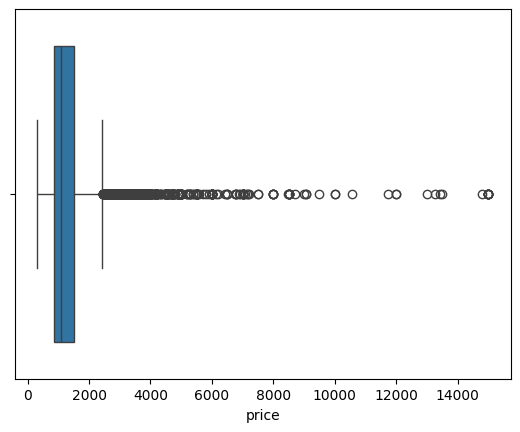

In [101]:
# grafico para detectar outliers en 'price'
sns.boxplot(x=data['price'])

In [102]:
# Buscamos outliers en 'price'
data[data['price'] > 14500]

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
1427,1487,14800,1,1,True,False,80,apartment,Ciutat Vella,185.000000
1705,1772,15000,4,1,True,False,450,flat,Sarria-Sant Gervasi,33.333333
2335,2427,15000,4,3,True,False,450,apartment,Sarria-Sant Gervasi,33.333333
2653,2754,15000,4,5,True,True,450,flat,Sarria-Sant Gervasi,33.333333
4076,4220,15000,4,3,True,True,450,flat,Sarria-Sant Gervasi,33.333333
4565,4725,15000,4,4,True,True,475,apartment,Sarria-Sant Gervasi,31.578947
6718,6951,15000,2,3,False,False,288,flat,Eixample,52.083333
7399,7646,15000,4,5,True,False,380,apartment,Sarria-Sant Gervasi,39.473684
7670,7928,15000,4,4,True,False,450,flat,Sarria-Sant Gervasi,33.333333


In [103]:
# eliminamos los outliers en 'price'
data.drop(data[data.price > 14500].index, inplace=True)
data.reset_index(drop=True, inplace=True)

<Axes: xlabel='square_meters_price'>

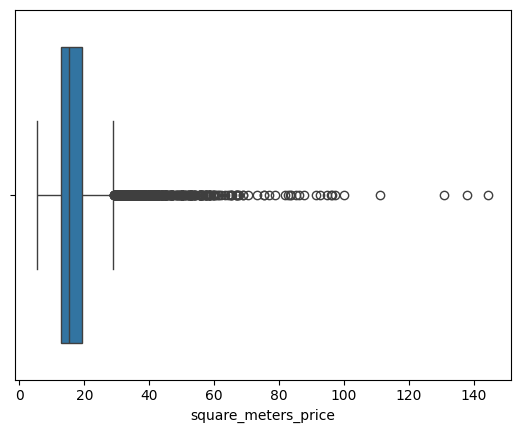

In [104]:
# grafico para detectar outliers en 'square_meters_price'
sns.boxplot(x=data['square_meters_price'])

In [105]:
# Buscamos outliers en 'square_meters_price'
data[data['square_meters_price'] > 175]

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price


In [106]:
# eliminamos los outliers en 'square_meters_price'
data.drop(data[data.square_meters_price > 175].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [107]:
# Estos resultados de viviendas con mas de 6 baños son bastante sospechosos 
data[data['bathroom'] > 6]

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
302,312,8482,4,7,True,True,225,flat,Les Corts,37.697778
5763,5985,1995,4,8,False,False,100,flat,Eixample,19.950000
7459,7719,5500,5,8,True,True,280,attic,Sarria-Sant Gervasi,19.642857


In [108]:
# así que también los vamos a eliminar
data.drop(data[data['bathroom'] > 6].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [109]:
# Lo guardamos todo en un nuevo archivo de base de datos
data.to_csv('../data/base_dades_neta.csv', index=False)